# Random Forest Model

In [60]:

import pandas as pd

# Read in the data
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

save_path = 'C:\\Users\\aoife\Documents\\Project\\'


# Read in initial file
#df = pd.read_csv(folder_path + 'concatenated_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'ssq_score'])


# Read in data with surveys
# df = pd.read_csv(folder_path + 'activity_and_survey_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])

# Read in data with feature engineering
#df = pd.read_csv(folder_path + 'final_activity_and_survey_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'steps_per_hour', 'totalDistance', 'dist_per_hour', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'AMCH2', 'AMCH2A', 'AMCH3', 'AMCH3A', 'AMCH5', 'NapCount', 'PMCH1', 'PMCH2A', 'alcohol', 'caffeine_y', 'medication'])

# Read in data with times of day
df = pd.read_csv(folder_path + 'final_timed_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'totalSteps', 'stepsTotalDuration', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance', 'AMCH2', 'AMCH2A', 'AMCH3', 'AMCH3A', 'AMCH5', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])
print(df.head()),
print(df.shape)

                          participantId  bodyMass_kg  height_m        bmi  \
0  38d8d1df-cf8e-454b-95c7-841d84820635    82.529504    1.8796  23.360297   
1  38d8d1df-cf8e-454b-95c7-841d84820635    82.529504    1.8796  23.360297   
2  3e6dce9a-31f9-42a4-bd68-cb040d4613c2    93.914800    1.9304  25.202256   
3  55d49397-8aae-4c41-be90-a892217a9d1d   111.130000    1.6510  40.769667   
4  696ed394-0da4-4a36-8b02-e59e68747a3d    70.995970    1.8542  20.650023   

   mean_hr_morning  max_hr_morning  min_hr_morning  mean_hr_afternoon  \
0              0.0             0.0             0.0           0.000000   
1              0.0             0.0             0.0           0.123766   
2              0.0             0.0             0.0           1.216750   
3              0.0             0.0             0.0           1.725000   
4              0.0             0.0             0.0           1.002846   

   max_hr_afternoon  min_hr_afternoon  ...  wake_up_choices  wake_ups  \
0             0.000      

In [61]:
# Train test split

from sklearn.model_selection import GroupKFold, GridSearchCV

gkf = GroupKFold(n_splits=10)


In [62]:
# X - features

### 1.
# X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','stepsTotalDuration','totalDistance','dwrTotalDuration']].values

### 2.
# X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','stepsTotalDuration','totalDistance','dwrTotalDuration', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values

### 3.
#X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','steps_per_hour','totalDistance','dist_per_hour', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values

### 4.
X = df[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'totalSteps', 'stepsTotalDuration', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance', 'AMCH2', 'AMCH2A', 'AMCH3', 'AMCH3A', 'AMCH5', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values


# y - target
y = df['ssq_score'].values

groups = df['participantId'].values

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Lists to store evaluation metrics
train_rmse_scores = []
test_rmse_scores = []
train_predicted_vals = []
train_actual_vals = []
test_predicted_vals = []
test_actual_vals = []



In [64]:
import numpy as np

# Dataframe to store all predictions

#column_names = ['participantId','bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','stepsTotalDuration','totalDistance','dwrTotalDuration', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'AMCH2', 'AMCH2A', 'AMCH3', 'AMCH3A', 'AMCH5', 'NapCount', 'PMCH1', 'PMCH2A', 'alcohol', 'caffeine_y', 'medication', 'actual_ssq', 'prediction']

column_names = ['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'totalSteps', 'stepsTotalDuration', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance', 'AMCH2', 'AMCH2A', 'AMCH3', 'AMCH3A', 'AMCH5', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'actual_ssq', 'prediction']

all_predictions_df = pd.DataFrame(columns=column_names)

print("\n Groups are: ")
print(groups)
print(type(groups))

for i, (train_index, test_index) in enumerate(gkf.split(X, y, groups=groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_groups = groups[train_index]
    print(f"Fold {i}:")
    '''
    # just to check the groups are being split correctly
    print(f"  Train: index={train_index}, group={groups[train_index]}")
    print(f"  Test:  index={test_index}, group={groups[test_index]}")'''
    
    rf.fit(X_train, y_train)

    # Evaluate on train data

    train_pred = rf.predict(X_train)
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    train_rmse_scores.append(train_rmse)

    print(f"Made training predictions for fold {i}.")

    test_pred = rf.predict(X_test)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)
    test_rmse_scores.append(test_rmse)

    print(f"Made testing predictions for fold {i}.")

    # Predicted and actual values
    train_predicted_vals.extend(train_pred)
    train_actual_vals.extend(y_train)
    test_predicted_vals.extend(test_pred)
    test_actual_vals.extend(y_test)

    for j, prediction in enumerate(test_pred):
        print(f"Predicted: {prediction:.2f}, features: {X_test[j]}")

    # Dataframe to store predcitions for this fold

    fold_predictions_df = pd.DataFrame(columns=column_names)
    fold_predictions_df['participantId'] = groups[test_index]
    fold_predictions_df.iloc[:, 1:len(column_names) - 2] = X_test
    fold_predictions_df['actual_ssq'] = y_test
    fold_predictions_df['prediction'] = test_pred

    all_predictions_df = pd.concat([all_predictions_df, fold_predictions_df], ignore_index=True)

    print(f"Concatenated predictions for fold {i}.")



# Average scores
avg_train_rmse = np.mean(train_rmse_scores)
avg_test_rmse = np.mean(test_rmse_scores)

print("Average Train RMSE:", avg_train_rmse)
print("Average Test RMSE: ", avg_test_rmse)
    


 Groups are: 
['38d8d1df-cf8e-454b-95c7-841d84820635'
 '38d8d1df-cf8e-454b-95c7-841d84820635'
 '3e6dce9a-31f9-42a4-bd68-cb040d4613c2'
 '55d49397-8aae-4c41-be90-a892217a9d1d'
 '696ed394-0da4-4a36-8b02-e59e68747a3d'
 '696ed394-0da4-4a36-8b02-e59e68747a3d'
 '696ed394-0da4-4a36-8b02-e59e68747a3d'
 '696ed394-0da4-4a36-8b02-e59e68747a3d'
 '696ed394-0da4-4a36-8b02-e59e68747a3d'
 '696ed394-0da4-4a36-8b02-e59e68747a3d'
 '696ed394-0da4-4a36-8b02-e59e68747a3d'
 '696ed394-0da4-4a36-8b02-e59e68747a3d'
 '696ed394-0da4-4a36-8b02-e59e68747a3d'
 '6c52af7f-cef0-4ad2-bad4-74d3d99daee8'
 '6c52af7f-cef0-4ad2-bad4-74d3d99daee8'
 '6c52af7f-cef0-4ad2-bad4-74d3d99daee8'
 '8c417de5-4a46-4b50-b92e-ddc7ebcbbc3f'
 'ae7f1f56-6455-4fae-9fb0-dfb28e51f3ab'
 'b1406c4e-e6ac-4297-a9e4-335ca5ef04de'
 'b1406c4e-e6ac-4297-a9e4-335ca5ef04de'
 'b1406c4e-e6ac-4297-a9e4-335ca5ef04de'
 'b598f54f-791d-409f-9313-0172b419f47e'
 'b598f54f-791d-409f-9313-0172b419f47e'
 'b598f54f-791d-409f-9313-0172b419f47e'
 'b598f54f-791d-409f-9313

In [65]:
# print predictions df

print(all_predictions_df.head(10))

# save to csv

all_predictions_df.to_csv(save_path + 'random_forest_predictions.csv', index=False)

                          participantId bodyMass_kg  height_m        bmi  \
0  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
1  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
2  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
3  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
4  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
5  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
6  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
7  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
8  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
9  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   

  mean_hr_morning max_hr_morning min_hr_morning mean_hr_afternoon  \
0           0.329          0.983            0.0           0.39864   
1        0.125971        

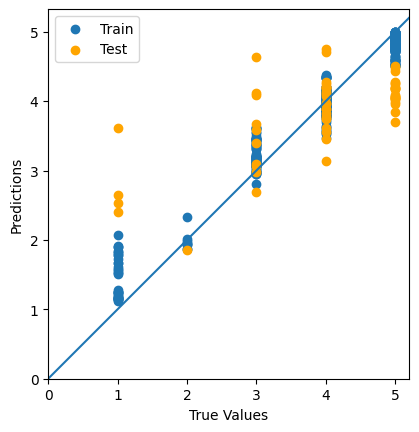

In [66]:
# Plot the results

import matplotlib.pyplot as plt

plt.scatter(train_actual_vals, train_predicted_vals, label = 'Train')
plt.scatter(test_actual_vals, test_predicted_vals, label= 'Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()


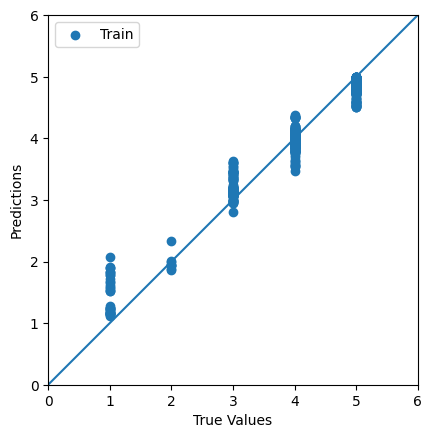

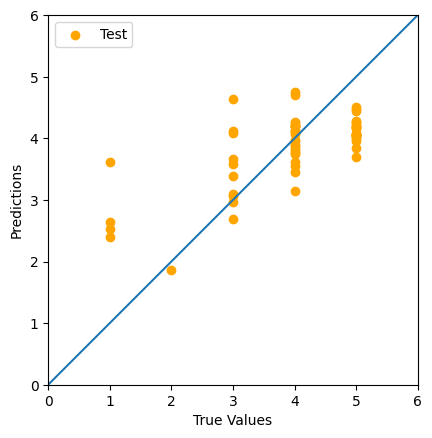

In [67]:
# Plot the results

import matplotlib.pyplot as plt

plt.scatter(train_actual_vals, train_predicted_vals, label = 'Train')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()


# Plot the results

import matplotlib.pyplot as plt

plt.scatter(test_actual_vals, test_predicted_vals, label= 'Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()
